# Imports

In [2]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
universe = ASIA_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [4]:
settings = Settings(start_date = "2000-01-01", end_date = "2016-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

# Other Data

# Data integrity

# Signal

In [5]:
spot2 = spot_ndf.copy()

spot2["USDIDR"] = spot_ndf["USDIDR"] - ndf["USDIDR"]/fwd_scale["USDIDR"]
spot2["USDINR"] = spot_ndf["USDINR"] - ndf["USDINR"]/fwd_scale["USDINR"]
spot2["USDMYR"] = spot_ndf["USDMYR"] - ndf["USDMYR"]/fwd_scale["USDMYR"]
spot2["USDTWD"] = spot_ndf["USDTWD"] - ndf["USDTWD"]/fwd_scale["USDTWD"]
spot2["USDKRW"] = spot_ndf["USDKRW"] - ndf["USDKRW"]/fwd_scale["USDKRW"]
spot2["USDPHP"] = spot_ndf["USDPHP"] - ndf["USDPHP"]/fwd_scale["USDPHP"]

spot_price_ori2 = spot2.pipe(fill_date, True).pipe(omit_trailing_na).pipe(omit_leading_na, how = "any")
spot_price_usd2 = spot_price_ori2.pipe(standardize_series, "prices")[ALL_FX]

In [5]:
sig = spot_price_usd2[universe].pipe(fill_date, True).rolling(window = 252*6, min_periods = 252*3).apply(lambda x: (x[-1]/x[0])-1).pipe(demean_xs).pipe(top_bottom_xs).pipe(cap_helper, 0.2).pipe(rolling_mean, 5) * -1

<AxesSubplot:>

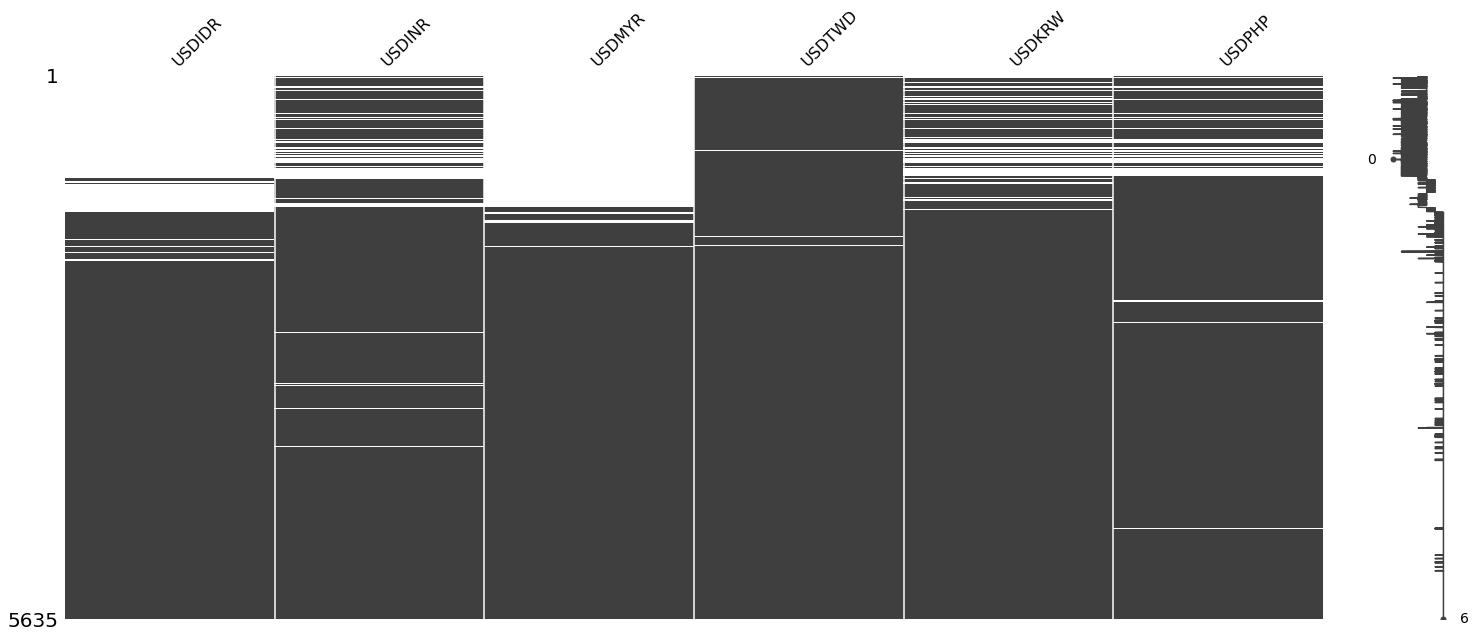

In [16]:
msmx(ndf.pipe(fill_date))

# Backtest Daily Rebal

In [6]:
daily_bt = Backtest(signal = sig, asset_returns = total_returns, tcost = abs(total_returns*0), settings = settings)
daily_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [7]:
get_summary(daily_bt)

Returns   : 0.05263985578155757
Vol       : 0.10372324434477424
SR        : 0.5075029817480796
Max DD    : -37.07

C Returns : 0.04838811113525239
C SR      : 0.4651600502226348
C Max DD  : -32.11

Hit rate  : 0.516
W | N | L : 0.52 | 0.0 | 0.48
W/L Ratio : 1.06


In [8]:
get_returns_stats(daily_bt.asset_rtn, daily_bt.wts)

,USDSGD,USDTHB,USDTWD,USDKRW,USDPHP,USDINR,USDIDR,USDMYR,USDCNH
annualized_return,0.206555,-3.089218,1.208389,0.98487,3.859137,0.283809,1.311356,1.129229,17.800399
sharpe,0.049494,-0.589049,0.335894,0.132445,0.728405,0.05123,0.293853,1.277408,2.733983
dollar_sharpe,0.029967,-0.627164,0.329791,0.110948,0.699559,0.023655,0.274821,1.245411,1.769241
trade_sharpe,0.066243,-0.862821,0.576896,0.146797,1.138111,0.076017,0.401901,6.947241,2.733983
long_sharpe,0.066243,-0.862821,0.876818,-0.147688,0.101271,3.07727,NaN,6.947241,2.733983
short_sharpe,NaN,NaN,0.484131,0.469019,1.483534,0.018576,0.401901,NaN,NaN
sortino,0.025399,-0.255491,0.142457,0.080537,0.320774,0.024757,0.147852,0.321556,1.617142
max_drawdown,-14.208086,-44.973717,-7.705111,-28.689459,-7.956876,-32.144156,-9.585294,-0.402986,-1.196669
max_drawdown_start,2003-11-27,2009-03-02,2008-03-24,2003-06-27,2005-05-05,2011-08-01,2014-05-16,2013-06-12,2016-12-16
max_drawdown_end,2011-08-01,2013-04-19,2013-10-04,2007-10-31,2005-07-04,2013-09-03,2015-09-28,2013-06-13,2016-12-21


In [9]:
daily_bt.model_rtn.skew()

-0.10635881420140592

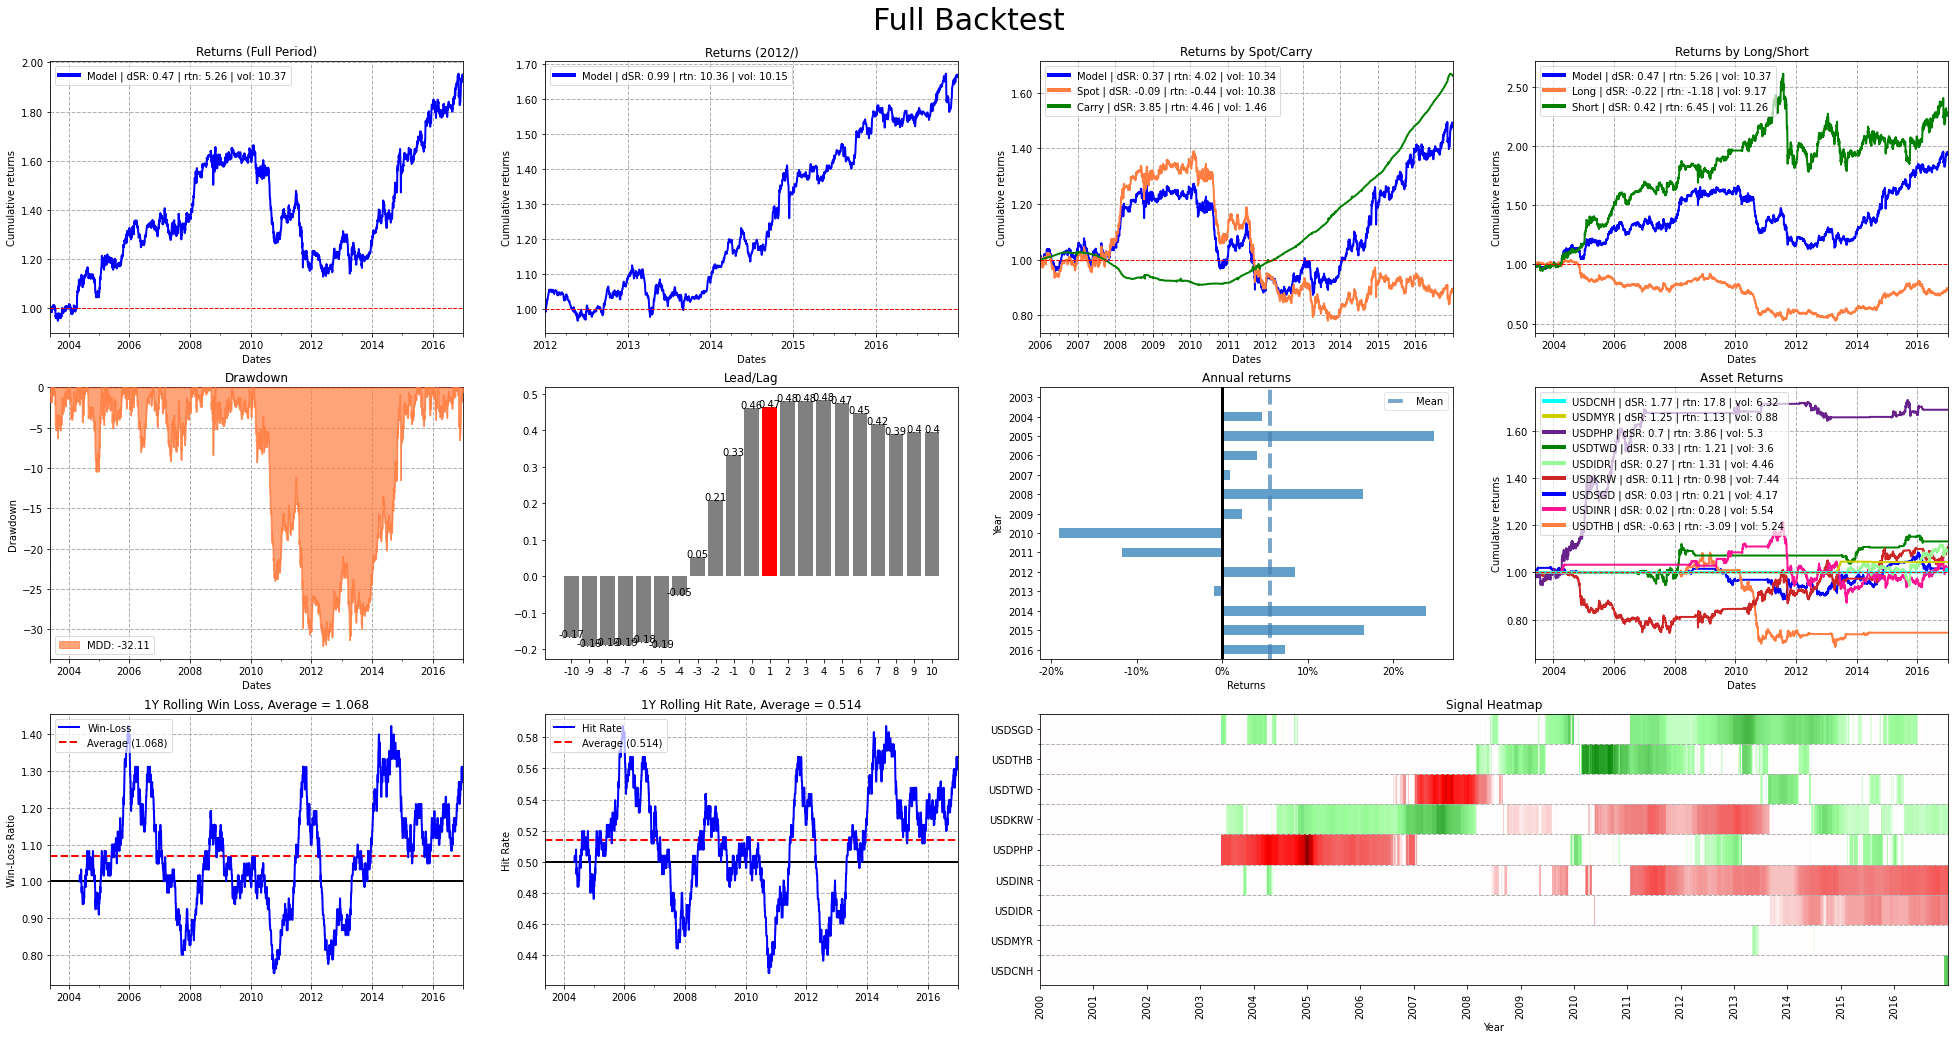

In [10]:
plot_bt(daily_bt)

# Backtest Weekly Rebal

In [11]:
weekly_bt = Backtest(signal = sig, 
             asset_returns = total_returns, 
             tcost = abs(total_returns*0), 
             settings = settings,
             settings_inject = {"rebalance_period":"friday"})
weekly_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [12]:
get_summary(weekly_bt)

Returns   : 0.055066571061274716
Vol       : 0.10415106108877435
SR        : 0.5287182913512335
Max DD    : -38.29

C Returns : 0.05088524747555993
C SR      : 0.48319204588391357
C Max DD  : -33.38

Hit rate  : 0.519
W | N | L : 0.52 | 0.0 | 0.48
W/L Ratio : 1.08


In [13]:
get_returns_stats(weekly_bt.asset_rtn, weekly_bt.wts)

,USDSGD,USDTHB,USDTWD,USDKRW,USDPHP,USDINR,USDIDR,USDMYR,USDCNH
annualized_return,0.173069,-3.067063,1.322224,1.13,3.9168,0.18653,1.595447,1.067096,7.822758
sharpe,0.041385,-0.578625,0.363958,0.152216,0.735806,0.033419,0.354743,1.19644,1.1457
dollar_sharpe,0.021408,-0.638056,0.362099,0.133727,0.698146,0.00514,0.343526,1.107664,1.742737
trade_sharpe,0.045208,-0.874773,0.662423,0.154845,1.132747,0.059928,0.441896,6.993756,1.1457
long_sharpe,0.045208,-0.874773,1.150721,-0.084303,-0.048278,3.141829,NaN,6.993756,1.1457
short_sharpe,NaN,NaN,0.51268,0.418751,1.520048,0.001114,0.441896,NaN,NaN
sortino,0.021333,-0.251564,0.151549,0.090851,0.324183,0.015978,0.179819,0.313214,0.673882
max_drawdown,-14.037491,-45.959044,-7.393502,-27.775842,-7.953845,-32.374096,-9.290114,-0.425837,-1.186326
max_drawdown_start,2003-06-30,2008-12-01,2008-03-24,2004-07-30,2005-05-05,2011-08-01,2014-05-16,2013-06-12,2016-12-16
max_drawdown_end,2011-08-01,2013-04-19,2013-10-04,2007-10-31,2005-07-04,2013-09-03,2015-09-28,2013-06-13,2016-12-21


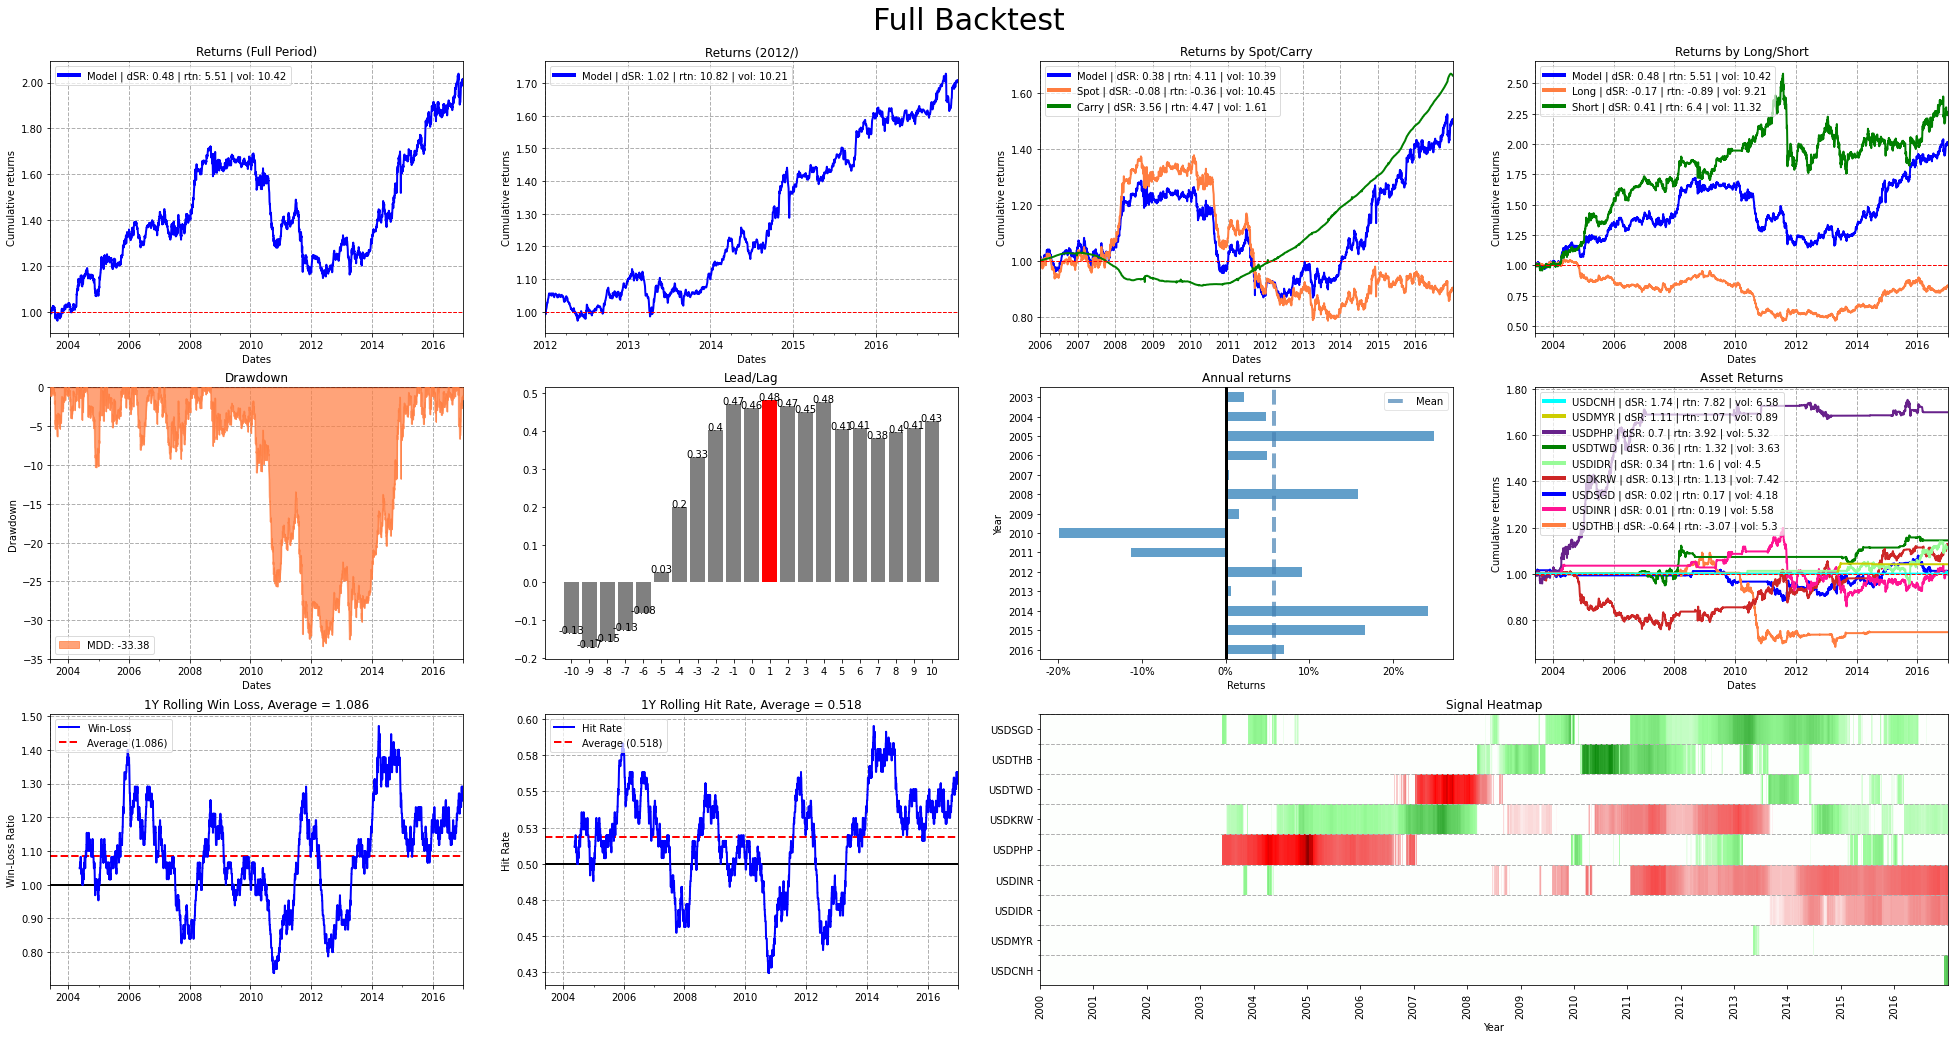

In [14]:
plot_bt(weekly_bt)

# Daily vs Weekly 

<AxesSubplot:title={'center':'Daily vs Weekly Rebal'}, xlabel='Dates', ylabel='Cumulative returns'>

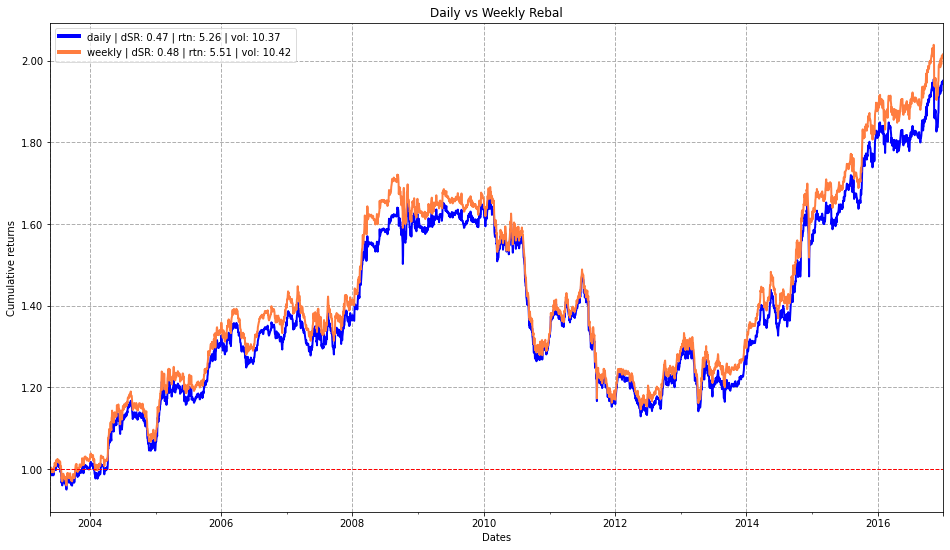

In [15]:
gen_plot_rtn(pd.concat([daily_bt.model_rtn.rename("daily"), weekly_bt.model_rtn.rename("weekly")], axis=1), main = "Daily vs Weekly Rebal")

In [16]:
# pickle.dump(daily_bt, open("../BT/value_sgneer_asia_daily.p", "wb"))
# daily_bt = pickle.load(open("../BT/value_sgneer_asia_daily.p", "rb"))

# pickle.dump(weekly_bt, open("../BT/value_sgneer_asia_weekly.p", "wb"))
# weekly_bt = pickle.load(open("../BT/value_sgneer_asia_weekly.p", "rb"))

# Regime Plot

# Sensitivity Analysis

In [ ]:
# pf.plot_monthly_returns_dist(bt_obj.model_rtn)